First Neural Network

5


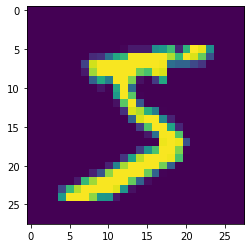

In [14]:
import tensorflow as tf 
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist #importing MNIST dataset into 'mnist' variable

(x_train, y_train), (x_test, y_test) = mnist.load_data() #.load_data() is declaring the x_ and y_ variables 
                                                         #with the corresponding MNIST data

plt.imshow(x_train[0]) #Display plot of specificed datum (image data only).
print(y_train[0])      #Display MNIST data label.

In [15]:
print(x_train.shape)                                #shows how many dimensions the x_train array has
x_train = tf.keras.utils.normalize(x_train, axis=1) #normalize 2nd dimension (axis=1) of the data
x_test = tf.keras.utils.normalize(x_test, axis=1)   #normalize again only for y_train

(60000, 28, 28)


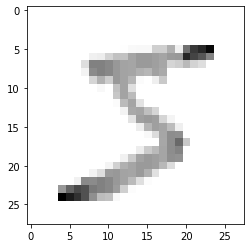

In [16]:
plt.imshow(x_train[0], cmap = plt.cm.binary) #turns plot grayscale

In [34]:
model = tf.keras.models.Sequential() #initializing 'model' object with a .Sequential neural network
                                     #.Sequential neural networks pass data (i.e. activation values of the neurons) 
                                     #through the NN's layers linearly.

model.add(tf.keras.layers.Flatten()) #layers.Flatten() manipulates the 2D input data into a 1D array
                                     #The input data changes with each linear movement through the layer 
                                     #(input layer has MNIST data, the 2nd layer receives the input layer's activation pattern as the input data, and so on).

model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))  #.layers.Dense() is creating a 'densely-connected' hidden layer that is 128 neurons wide 
                                                              #and uses RELU to calculates the min threshold that a neuron must meet to have a non-zero activation value
                                                              #densely-connected layers are hidden layers whose individual neuron's activation is 
                                                              #determined by the activation pattern of the entire previous layer

model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu)) #creating a 2nd hidden layer. 
                                                             #Note: 2+ hidden layers constitutes a 'deep neural network'

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #creates the output layer. 
                                                               #The .softmax only allows the NN to 'choose' one output neuron as the 'answer'

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']) #We are selecting one cost function among many available. 
                                     #The 'optimizer', 'loss', and 'metrics' can be interchanged with options besides 'adam', 'categorical_crossentropy', and 'accuracy'. 
                                     #Different combinations results in a different cost function
                                     #We could experiment with different cost functions to see 
                                     #which function makes the NN perform better. Look on Keras.io/api

In [35]:
model.fit(x_train, y_train, epochs = 3) #trains the model we just built for 3 epochs 
                                        #(cycles through entire MNIST dataset)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2214 - accuracy: 0.9348
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9726
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0571 - accuracy: 0.9816


In [36]:
val_loss, val_acc = model.evaluate(x_test, y_test) #model is tested using the validation dataset

313/313 [==============================] - 0s 751us/step - loss: 0.1037 - accuracy: 0.9699


In [37]:
model.save('George.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: George.model/assets


In [38]:
predictions = model.predict(x_test) #This has the model label the data. 
                                    #If you feed it new data it will guess the number


In [41]:
import numpy as np
for x in range(10):
    print(np.argmax(predictions[x])) #.argmax() identifies the index of the maximum value in an array 
                                     #(the output array's max element is the 'guess' of the model)

7
2
1
0
4
1
4
9
5
9


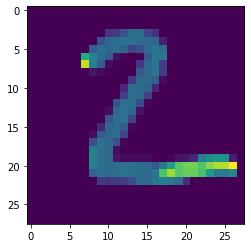

In [43]:
plt.imshow(x_test[1])

In [44]:
new_model = tf.keras.models.load_model('George.model') #Creates an instance of George.model

array([[3.6922561e-09, 1.2254383e-06, 4.3105738e-06, ..., 9.9997544e-01,
        1.0203983e-08, 8.4278984e-09],
       [1.7372935e-10, 7.4002089e-04, 9.9924845e-01, ..., 7.9269888e-09,
        4.5294475e-09, 3.6963205e-16],
       [2.8249760e-09, 9.9999702e-01, 5.5286409e-07, ..., 1.0468480e-06,
        5.3230264e-07, 2.1708813e-09],
       ...,
       [8.6083967e-09, 1.0553003e-06, 6.2471668e-09, ..., 1.6767297e-05,
        1.5082035e-06, 1.6446564e-05],
       [2.3511578e-07, 4.7546808e-07, 1.9746961e-08, ..., 9.1582734e-07,
        6.4984051e-04, 4.6946258e-10],
       [4.0852899e-07, 7.3893183e-11, 3.0601403e-11, ..., 1.2748627e-12,
        4.0603748e-10, 1.3729699e-10]], dtype=float32)